In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_excel('data/get_around_delay_analysis.xlsx')

In [5]:
df.shape

(21310, 7)

In [6]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000.0,363965.0,mobile,canceled,NaN,NaN,NaN
1,507750.0,269550.0,mobile,ended,-81.0,NaN,NaN
2,508131.0,359049.0,connect,ended,70.0,NaN,NaN
3,508865.0,299063.0,connect,canceled,NaN,NaN,NaN
4,511440.0,313932.0,mobile,ended,NaN,NaN,NaN


In [7]:
# Basic stats
print("Basics statistics: ")
df_desc = df.describe(include='all')
display(df_desc)
print()

Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [9]:
print("Percentage of missing values: ")
df.isna().sum()/df.shape[0]*100

Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

looks like we can't use the *previous_ended_rental_id*, *time_delta_with_previous_rental_in_minutes* columns, too many missing values. maybe later

<AxesSubplot:>

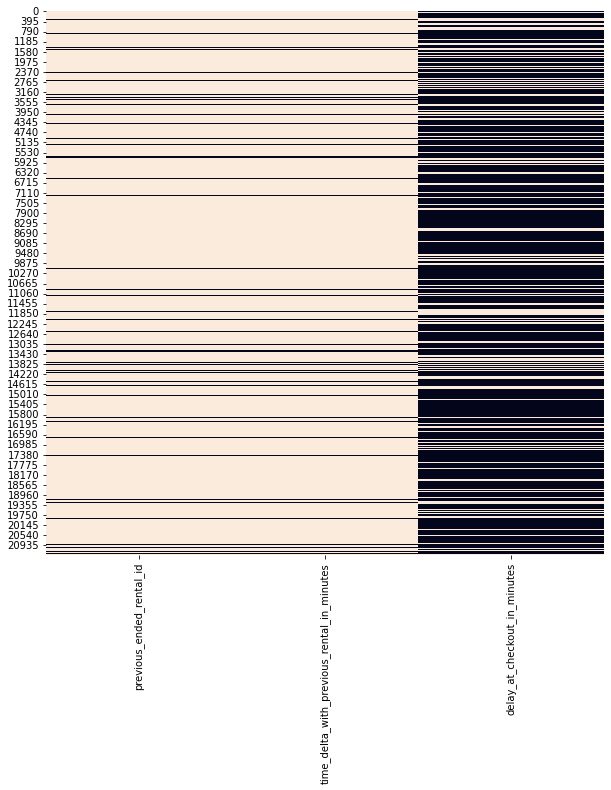

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['previous_ended_rental_id', 'time_delta_with_previous_rental_in_minutes', 'delay_at_checkout_in_minutes']].isna(), cbar=False)

missing values of *previous_ended_rental_id* matches the ones of *time_delta_with_previous_rental_in_minutes*

In [11]:
df_without_na = df.dropna(subset=['time_delta_with_previous_rental_in_minutes', 'delay_at_checkout_in_minutes'])

In [12]:
df_without_na.shape

(1515, 7)

In [13]:
df_without_na['car_id'].nunique()

951

In [14]:
df_without_na[df_without_na['state'] == 'canceled']

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes


By dropping the missing values of *delay_at_checkout* in our dataset we also removed every 'canceled' rental

### visualizing categorical columns

In [15]:
df.dtypes

rental_id                                     float64
car_id                                        float64
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                  float64
previous_ended_rental_id                      float64
time_delta_with_previous_rental_in_minutes    float64
dtype: object

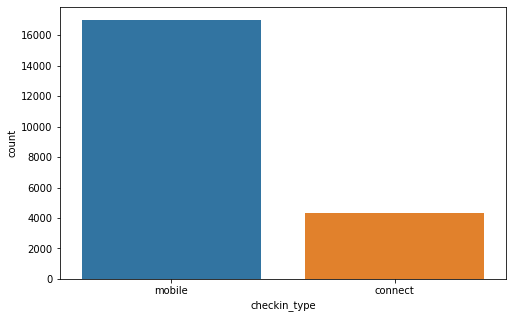

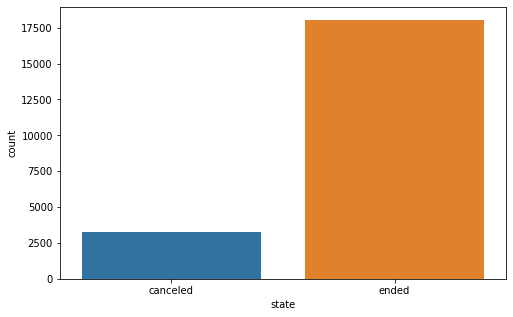

In [16]:
for col in df.select_dtypes('object'):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)

### visualizing numerical columns

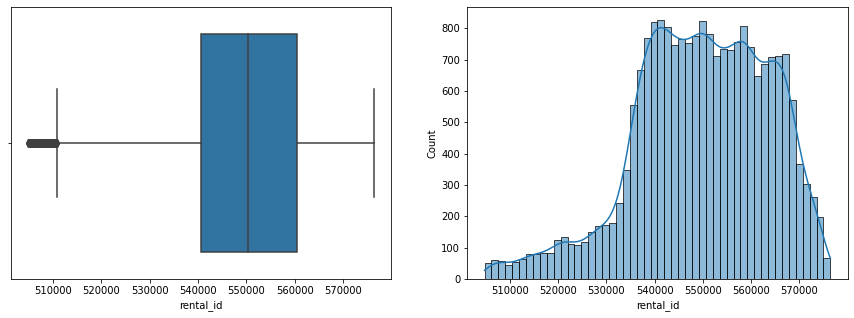

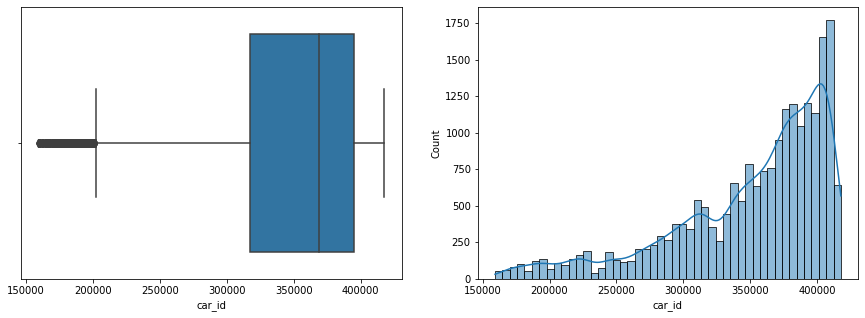

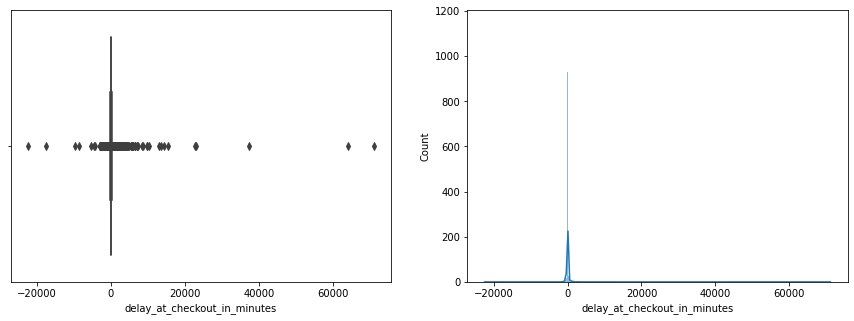

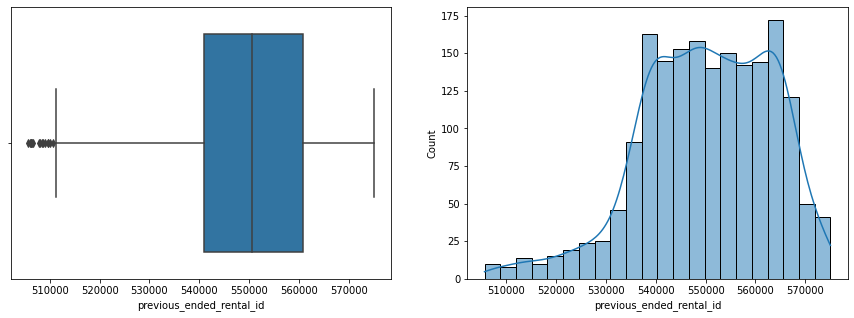

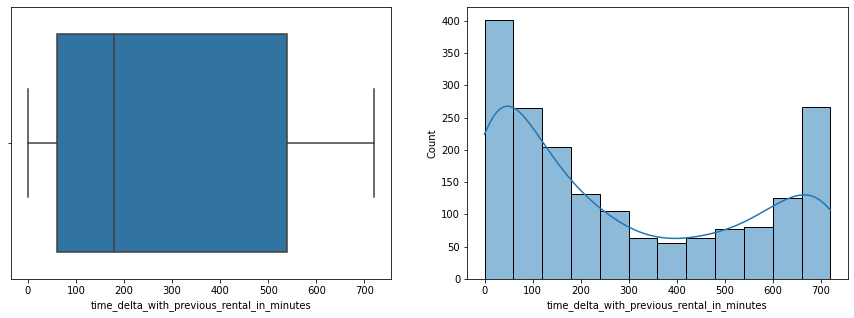

In [17]:
for col in df.select_dtypes('float'):
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    sns.boxplot(data=df, x=col, ax=ax[0])
    sns.histplot(data=df, x=col, kde=True, ax=ax[1])

We observe that *the delay at checkout* is very widespread, gaussian like shaped and centered in 60 min (mean), with an std of 1000 min (16.6 hours). It appears very small compared to the overall range but a non-negligeable number of people renting return the cars very late. On the other hand, about 50% of the delay are negative.  

*time_delta_with_previous_rentals_in_minutes* is the delay between a checkout and a checkin. From its distribution, we oberve that a lot of people rent the car ~60 min after last checkout -> In average, people returns the car 60 min late ! 

retard au moment du règlement = delay at checkout

In [18]:
df.shape[0]

21310

In [19]:
df['rental_id'].nunique()

21310

In [20]:
df['car_id'].nunique()

8143

Each rental id is unique, our study is based on a 8143 car fleet

**Investigation Connect cars and Mobile cars**

In [21]:
px.histogram(data_frame=df, x='delay_at_checkout_in_minutes', color='checkin_type', histnorm='percent', barmode='overlay')

Users choosing the mobile rental agrement return the car later than the ones using the connect agrement. This is not very suprising because in a mobile rental the owner can also be late for checkin/checkout.

In [22]:
px.histogram(data_frame=df, x='time_delta_with_previous_rental_in_minutes', color='checkin_type', nbins=100, histnorm='percent', barmode='overlay')

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Density'>

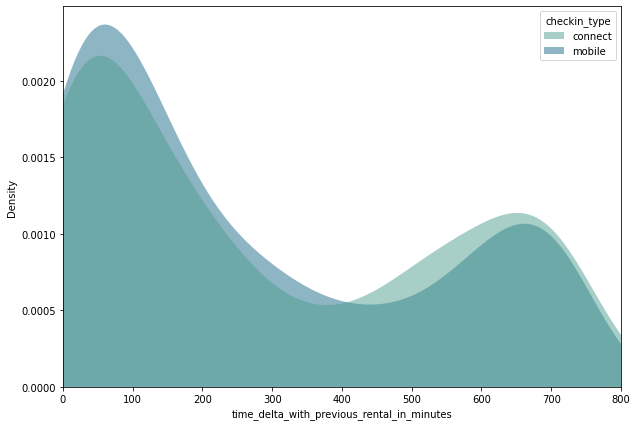

In [45]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.kdeplot(
   data=df_without_na, x="time_delta_with_previous_rental_in_minutes", hue="checkin_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

- Connect : more 'late checkers'
- Mobile : more 'early checkers'

<AxesSubplot:xlabel='delay_at_checkout_in_minutes', ylabel='Density'>

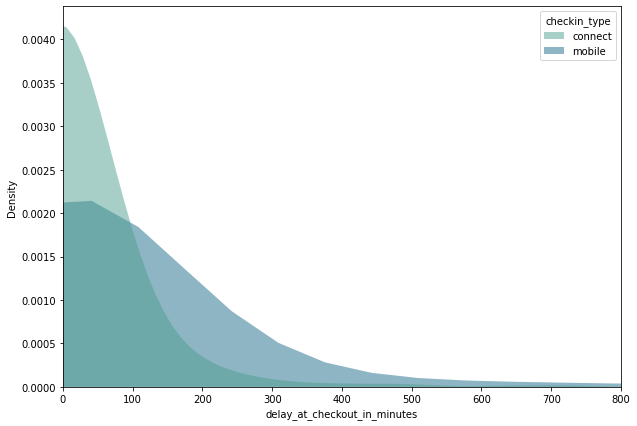

In [48]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)

sns.kdeplot(
   data=df_without_na, x="delay_at_checkout_in_minutes", hue="checkin_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Density'>

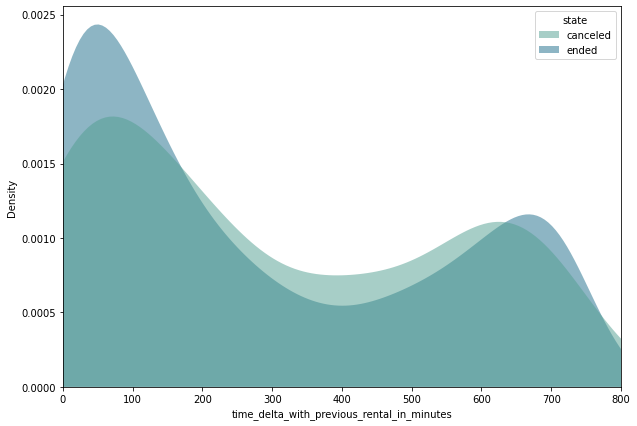

In [23]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)

sns.kdeplot(
   data=df, x="time_delta_with_previous_rental_in_minutes", hue="state",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

**how long should the minimum delay between two rental be?**

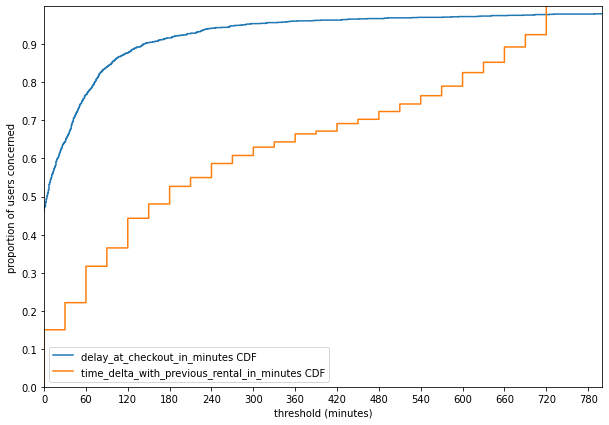

In [51]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.ecdfplot(df_without_na, x="delay_at_checkout_in_minutes", complementary=False, label="delay_at_checkout_in_minutes CDF")
sns.ecdfplot(df_without_na, x="time_delta_with_previous_rental_in_minutes", label="time_delta_with_previous_rental_in_minutes CDF")
plt.xlabel('threshold (minutes)')
plt.ylabel('proportion of users concerned')
plt.yticks(np.arange(0, 1, 0.1)) # Axes ranges                                                                                                                                                                                                                             
plt.xticks(np.arange(0, 800, 60)) 
plt.legend()


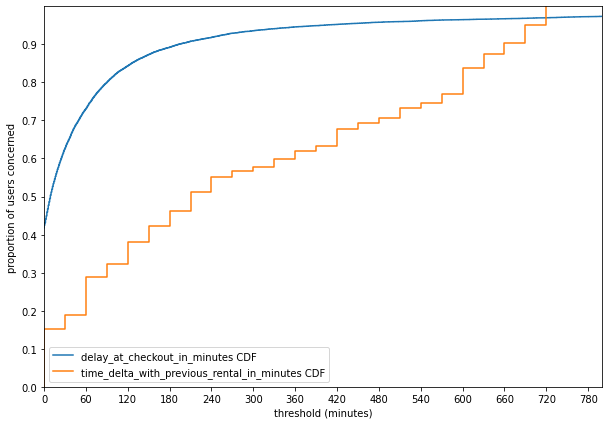

In [64]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.ecdfplot(df, x="delay_at_checkout_in_minutes", complementary=False, label="delay_at_checkout_in_minutes CDF")
sns.ecdfplot(df[df['state'] == 'canceled'], x="time_delta_with_previous_rental_in_minutes", label="time_delta_with_previous_rental_in_minutes CDF")
plt.xlabel('threshold (minutes)')
plt.ylabel('proportion of users concerned')
plt.yticks(np.arange(0, 1, 0.1)) # Axes ranges                                                                                                                                                                                                                             
plt.xticks(np.arange(0, 800, 60)) 
plt.legend()

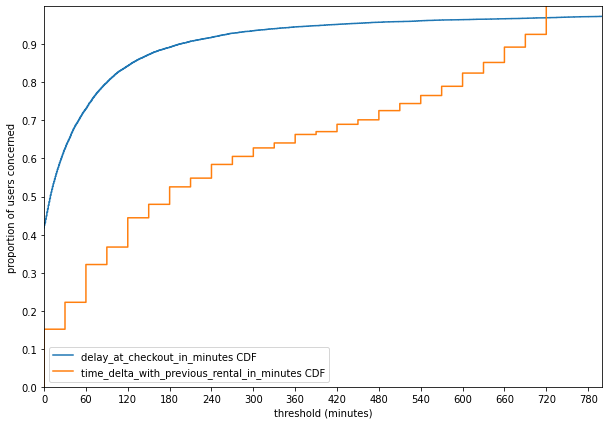

In [65]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.ecdfplot(df, x="delay_at_checkout_in_minutes", complementary=False, label="delay_at_checkout_in_minutes CDF")
sns.ecdfplot(df[df['state'] == 'ended'], x="time_delta_with_previous_rental_in_minutes", label="time_delta_with_previous_rental_in_minutes CDF")
plt.xlabel('threshold (minutes)')
plt.ylabel('proportion of users concerned')
plt.yticks(np.arange(0, 1, 0.1)) # Axes ranges                                                                                                                                                                                                                             
plt.xticks(np.arange(0, 800, 60)) 
plt.legend()

If the threshold is set at 60 min : 30% of the potential drivers are lost for the car owner (30% of the owners revenue is lost), but 70% of late return cases is solved. We are missing one information here : the number of cancelations avoided by the owner due to the augmentation of the threshold. on veut savoir en fait a quel point le retard de la personne d'avant a contraint la personne d'après a annuler sa course

In [52]:
df[df['delay_at_checkout_in_minutes'] < 60]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750.0,269550.0,mobile,ended,-81.0,NaN,NaN
5,511626.0,398802.0,mobile,ended,-203.0,NaN,NaN
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0
7,512303.0,371242.0,mobile,ended,-44.0,NaN,NaN
9,513434.0,256528.0,connect,ended,23.0,NaN,NaN
...,...,...,...,...,...,...,...
21296,571359.0,357612.0,mobile,ended,52.0,NaN,NaN
21304,573322.0,376491.0,connect,ended,-66.0,NaN,NaN
21306,573790.0,341965.0,mobile,ended,-337.0,NaN,NaN
21308,574852.0,362531.0,connect,ended,-76.0,NaN,NaN


<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Density'>

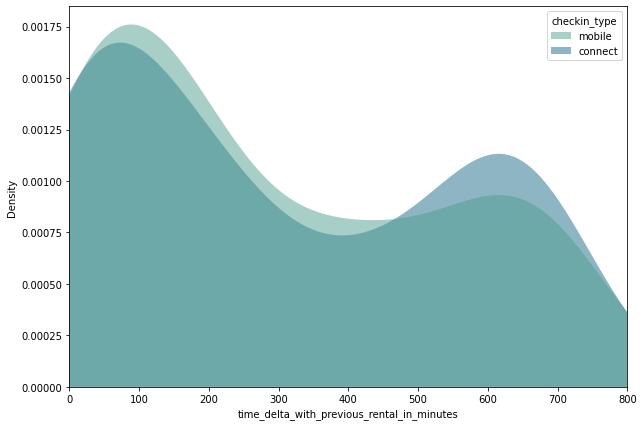

In [61]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.kdeplot(
   data=df[df['state'] == 'canceled'], x="time_delta_with_previous_rental_in_minutes", hue="checkin_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Density'>

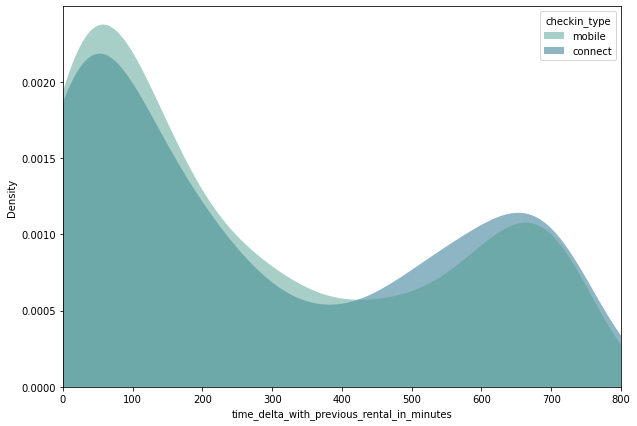

In [62]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.kdeplot(
   data=df[df['state'] == 'ended'], x="time_delta_with_previous_rental_in_minutes", hue="checkin_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)